In [73]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [92]:
version = 'uncertainty_aggr_0530_1500'
data_path = '../../data/uq_experiments/' + version + '/'
files = os.listdir(data_path)
files

def create_nested_dict(path, filenames):
    '''
    creates a nested dict based on filenames, which contain dicts as well
    Args:
        path: path to the files
        filenames: list of file names
    Returns:
        nested dict
    '''
    nested_dict = {}
    for file in filenames:
        with open(path + file, 'rb') as f:
            data = pickle.load(f)
        for key in data.keys():
            if key not in nested_dict:
                nested_dict[key] = data[key]
            else:
                for k in data[key].keys():
                    if k not in nested_dict[key]:
                        nested_dict[key][k] = data[key][k]
                    else:
                        for kk in data[key][k].keys():
                            if kk not in nested_dict[key][k]:
                                nested_dict[key][k][kk] = data[key][k][kk]
                            else:
                                for lll in data[key][k][kk].keys():
                                    if lll not in nested_dict[key][k][kk]:
                                        nested_dict[key][k][kk][lll] = data[key][k][kk][lll]
                                    else:
                                        for llll in data[key][k][kk][lll].keys():
                                            if llll not in nested_dict[key][k][kk][lll]:
                                                nested_dict[key][k][kk][lll][llll] = data[key][k][kk][lll][llll]
    return nested_dict
        
nested_dict = create_nested_dict(data_path, files)

# Get curves

## Mean and Variance

In [86]:
# check if numpy 

TypeError: object of type 'int' has no len()

In [94]:
def get_curves(dict, aggr='image_level_aggr', score='max_score', uncertainty='total_predictive_unc'):
    dict_curves = {}
    for modality in dict.keys():
        if modality not in dict_curves.keys():
            dict_curves[modality] = {}
        for method in dict[modality].keys():
            dict_curves[modality][method] = {'mean': [], 'std': [], 'noise': []}
            for i, noise in enumerate(dict[modality][method].keys()):  # TODO throw out indexing for next version
                if 'Mean' in dict[modality][method][noise].keys():
                    print(dict[modality][method][noise]['Mean'].keys())
                    v = dict[modality][method][noise]['Mean'][uncertainty][aggr][score]
                    # check if numpy array
                    if isinstance(v, np.ndarray):
                        dict_curves[modality][method]['mean'].append(v[i])
                    else:
                        dict_curves[modality][method]['mean'].append(v)
                    v = dict[modality][method][noise]['Std'][uncertainty][aggr][score]
                    if isinstance(v, np.ndarray):
                        dict_curves[modality][method]['std'].append(v[i])
                    else:
                        dict_curves[modality][method]['std'].append(v)
                    dict_curves[modality][method]['noise'].append(noise)
    return dict_curves
dict_curves = get_curves(nested_dict)

dict_keys(['total_predictive_unc'])
dict_keys(['total_predictive_unc'])
dict_keys(['total_predictive_unc'])
dict_keys(['total_predictive_unc'])
dict_keys(['total_predictive_unc'])
dict_keys(['total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['aleatoric_unc', 'epistemic_unc', 'total_predictive_unc'])
dict_keys(['al

# Plot 

In [79]:
colors = ['b','#7469B6', '#E1AFD1', '#33186B']

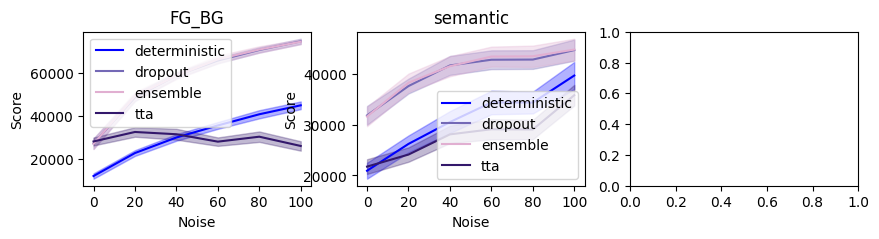

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(10, 2))
for i, modality in enumerate(dict_curves.keys()):
    for j, method in enumerate(dict_curves[modality].keys()):
        x = np.array(dict_curves[modality][method]['noise'])
        y = np.array(dict_curves[modality][method]['mean'])
        error = np.array(dict_curves[modality][method]['std'])
        ax[i].errorbar(x, y, label=method, color=colors[j])
        ax[i].fill_between(x, y-error, y+error, alpha=0.3, edgecolor=colors[j], facecolor=colors[j])
    ax[i].set_title(modality)
    ax[i].set_xlabel('Noise')
    ax[i].set_ylabel('Score')
    ax[i].legend()

# export as pdf

# Plot mean and variance

In [ ]:
# get curves